In [9]:
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt
import helper
import scipy.io.wavfile as wav
from datetime import datetime
import least_squares
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



In [10]:
notes = process_midi_to_note_info(
    '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi_files/Prelude1.midi')
chords = notes_to_chords(notes, True)


plot_piece(chords, 20)
plt.show()
score = dict_to_frequency_list(chords)
print(score)

NameError: name 'chain' is not defined

In [5]:
score[0]

[261.6255653005986]

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


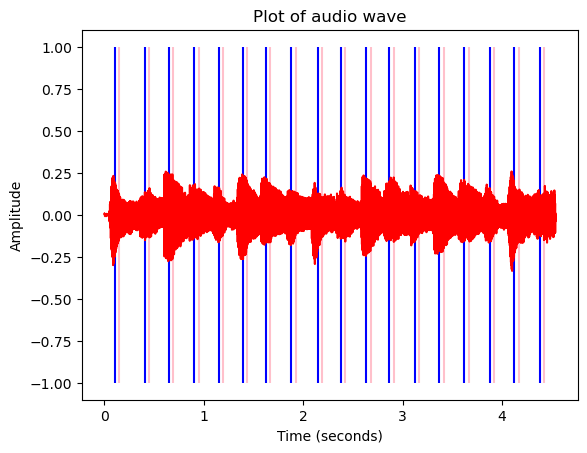

score frequencies:  [[261.6255653005986], [329.6275569128699], [391.99543598174927], [523.2511306011972], [659.2551138257398], [391.99543598174927], [523.2511306011972], [659.2551138257398], [261.6255653005986], [329.6275569128699], [391.99543598174927], [523.2511306011972], [659.2551138257398], [391.99543598174927], [523.2511306011972], [659.2551138257398], [261.6255653005986], [293.6647679174076], [440.0], [587.3295358348151], [698.4564628660078], [440.0], [587.3295358348151], [698.4564628660078], [261.6255653005986], [293.6647679174076], [440.0], [587.3295358348151], [698.4564628660078], [440.0], [587.3295358348151], [698.4564628660078], [246.94165062806206], [293.6647679174076], [391.99543598174927], [587.3295358348151], [698.4564628660078], [391.99543598174927], [587.3295358348151], [698.4564628660078], [246.94165062806206], [293.6647679174076], [391.99543598174927], [587.3295358348151], [698.4564628660078], [391.99543598174927], [587.3295358348151], [698.4564628660078], [261.6255

In [8]:
link =     '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/bach_1.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=2000, offset=2000, show=True, delta=0.08, num_samples=200000, normalise=False)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))
prob_matrix = np.zeros((len(score), len(sample_data)))

print('score frequencies: ' , score)
print(score[0])
print(type(time_samples))


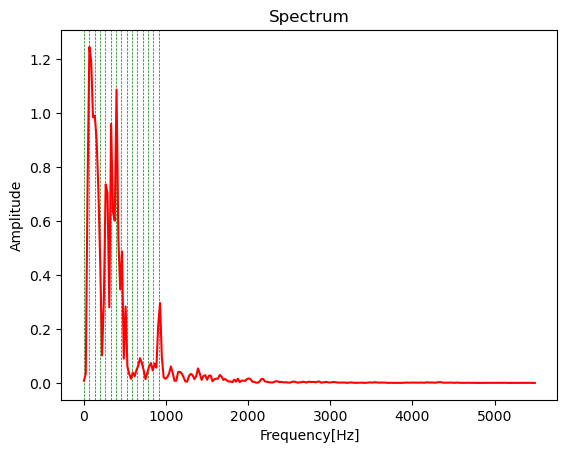

In [31]:

# for i in [130.8127826502993, 164.81377845643496, 97.99885899543733, 65.40639132514966]:
#     plt.axvline(x=i, color='green', linestyle='--', linewidth=0.5)
for i in range(15):
    plt.axvline(x=[i*65], color='green', linestyle='--', linewidth=0.5)
helper.plot_fft(sample_data[2])

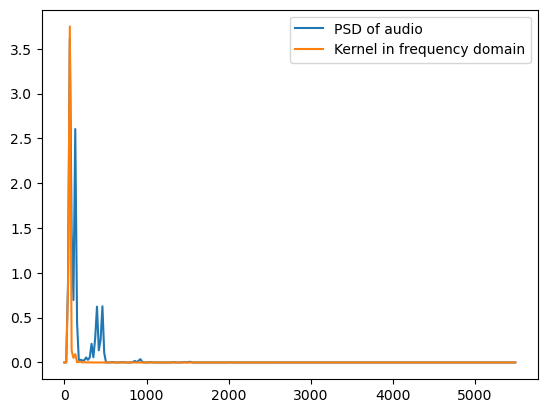

0it [00:00, ?it/s]

[3379.7327747]


1it [00:00,  1.98it/s]
0it [00:00, ?it/s]

5688.232836225066


1it [00:00,  2.02it/s]

5373.039304752875


In [10]:
a = abs(least_squares.opt_amplitude(sample_data[0], show=True, T=2,v=5,  f=[62])[0])
plt.show()
print(a)
print(-helper.stable_nlml(time_samples, sample_data[0],M=15,normalised=False,  f=[65]))

print(-helper.stable_nlml(time_samples, sample_data[0],M=15,normalised=False,  f=[65], amplitude=a))


In [13]:
print(-helper.stable_nlml(time_samples, sample_data[0],M=15,normalised=False,  f=[65]))
print(-helper.stable_nlml(time_samples, sample_data[0],M=15,normalised=False,  f=[130.8]))
print(-helper.stable_nlml(time_samples, sample_data[0], M=15,normalised=False,  f=[130.8127826502993, 164.81377845643496, 97.99885899543733, 65.40639132514966]))


0it [00:00, ?it/s]

1it [00:00,  7.69it/s]
1it [00:00, 12.14it/s]
0it [00:00, ?it/s]

2773.7999529326153
-3644.6244692519563


4it [00:00, 12.09it/s]

3134.082130092822


0it [00:00, ?it/s]

5it [00:02,  2.35it/s]


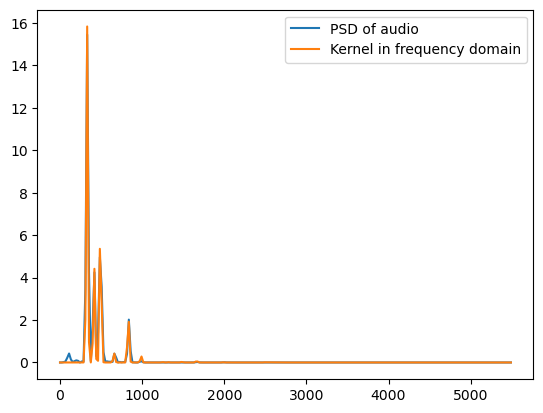

0it [00:00, ?it/s]

[13281.56593731  3927.98636427  6160.20593952    63.44312377
  1837.40212765]


5it [00:02,  2.46it/s]
5it [00:02,  2.49it/s]
5it [00:02,  2.44it/s]


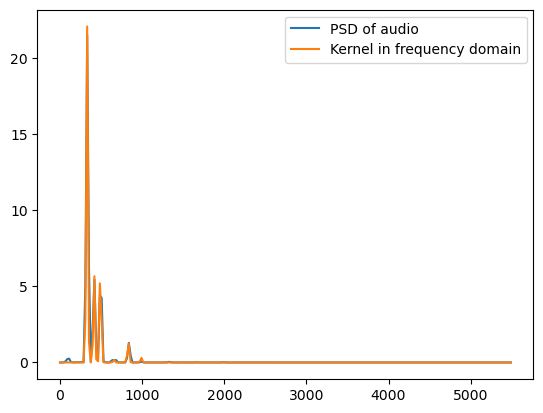

0it [00:00, ?it/s]

[18538.3665155   5047.39065751  5985.9867513    450.09328004
  1099.82435094]


5it [00:02,  2.40it/s]
5it [00:02,  2.48it/s]
5it [00:01,  2.52it/s]


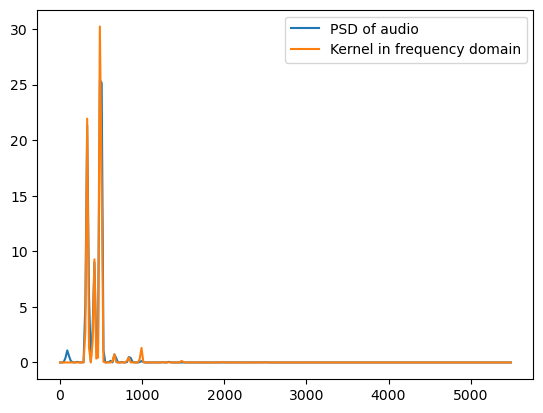

0it [00:00, ?it/s]

[18410.66510812  8257.5784632  34776.16110798    37.35222022
   196.79378283]


5it [00:02,  2.40it/s]
5it [00:01,  2.51it/s]

[-29163.107244011284, -12938.797188215674, -37865.1965946252]
[13316.705598329536, 13348.388666248567, 13349.396012426358]
[13828.134481125104, 14208.013106242546, 14318.519893566634]


In [28]:
# Looking into power normalisation
probs_amp_normalised = []
probs_normalised = []
probs = []
for sample in sample_data[:3]:
    probs.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,  normalised=False, f=[329, 415, 493, 659,
       831]))
    a = abs(least_squares.opt_amplitude(sample, show=True, T=2,v=5,  f=[329, 415, 493, 659,831])[0])
    plt.show()
    print(a)
    probs_amp_normalised.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,   f=[329, 415, 493, 659,
       831], amplitude=a))
    probs_normalised.append(-helper.stable_nlml(time_samples, sample,T=2,v=5,   f=[329, 415, 493, 659,
       831]))

print(probs)
print(probs_normalised)
print(probs_amp_normalised)
# sample0 = helper.power_normalise(sample_data[0])
# sample1 = helper.power_normalise(sample_data[1])
# sample2 = helper.power_normalise(sample_data[2])
# sample3 = helper.power_normalise(sample_data[3])

# sample4 = helper.power_normalise(sample_data[4])
# helper.plot_audio(time_samples, sample0)
# plt.show()
# helper.plot_audio(time_samples, sample1)
# plt.show()
# helper.plot_audio(time_samples,sample2)
# plt.show()
# helper.plot_audio(time_samples,sample3)
# plt.show()
# helper.plot_audio(time_samples, sample4)
# plt.show()

In [5]:
def oltw(sample_data: list, score: list, time_samples: np.ndarray, n: int):
    note_num, audio_num = 0, 0
    path = []
    for sample in sample_data[:-n]:
        probabilities = []
        num_lookahead = min(len(score) - note_num + 1, n)
        for i in range(num_lookahead):
            probabilities.append(helper.stable_nlml(time_samples=time_samples,sigma_f=0.1, Y=sample,  M=10,normalised=False, f=score[note_num+i]))
        
        # priors = 1/np.arange(1, num_lookahead+1)
        priors = np.ones(num_lookahead)
        probabilities = np.array(probabilities)
        probabilities = probabilities * priors

        index = np.argmin(probabilities)

        note_num += index
        audio_num += 1
        path.append((note_num, audio_num))
    return path






In [12]:
path = oltw(sample_data, score, time_samples, 4)

: 

TypeError: list indices must be integers or slices, not float

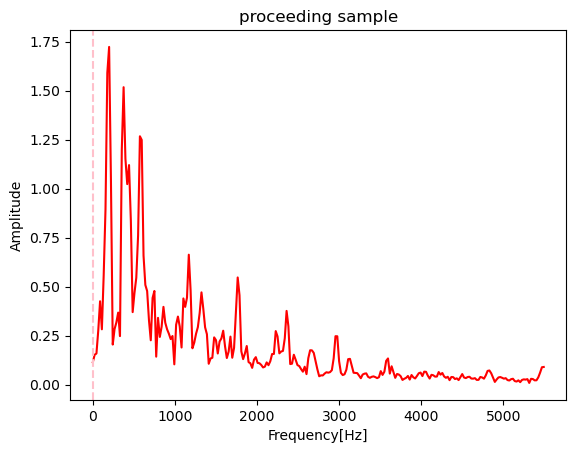

In [87]:
helper.plot_fft(sample_data[7], power_spectrum=True, title="proceeding sample")
for i, hz in enumerate(score[7]):
    plt.axvline(x=i, color='pink', linestyle='--')
    plt.text(score[7][hz], 0.85*max(plt.ylim()), va='bottom', rotation='vertical')
plt.show()

helper.plot_fft(data, power_spectrum=True, title="data sample just before")
plt.show()

helper.plot_fft(sample_data[8], power_spectrum=True, title="current sample")
plt.show()

np_8 = np.array(sample_data[8], power_spectrum=True)
new_8 = np_8 - data
helper.plot_fft(new_8, power_spectrum=True, title="current sample minus sample just")
plt.show()
print("8 ", -helper.stable_nlml(time_samples, sample_data[8],f=score[8] ))
print("7 ", -helper.stable_nlml(time_samples, sample_data[8],f=score[7] ))

print("new ", -helper.stable_nlml(time_samples, new_8,f=score[8] ))

# print("7,8 ", -helper.stable_nlml(time_samples, sample_data[8],f=[659.2551138257398, 440.0, 329.6275569128699, 55.0, 82.4068892282175, 220.0, 110.0] ))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (8, 7), (8, 8), (8, 9), (9, 10), (10, 11), (11, 12), (13, 13), (13, 14)]


/var/folders/n4/k97yk30s1wn32d7y6729kph80000gn/T/ipykernel_17487/1267370824.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(link)


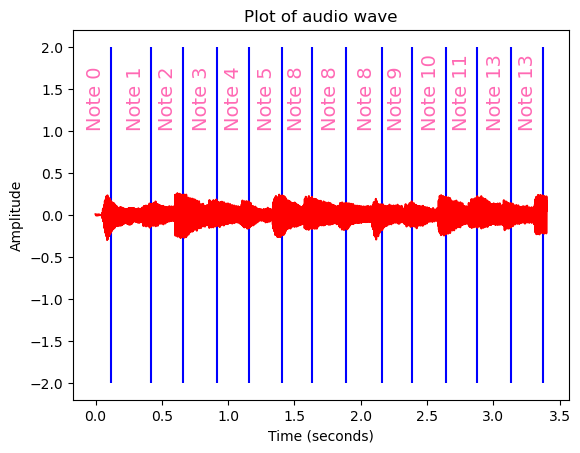

In [10]:
print(path)
sample_rate, data = wav.read(link)
data = data[:150000]
audio_duration = len(data)/sample_rate
time_samples = np.linspace(0, audio_duration, len(data))
helper.plot_audio(time_samples, data)

for i, time in enumerate(onset_times[:-4]):
    plt.vlines(time +2000/44100, ymin=-
                       2, ymax=2, colors='blue', zorder=2)
    note = path[i][0]
    plt.text(time, 1, f'Note {note}', color='#FF69B4', ha='right', va='bottom', rotation=90, fontsize=14)


In [8]:
print(-helper.relative_nlml(time_samples, sample_data[6], sigma_f=0.1 ,normalised=True, f=[522]))
print(-helper.relative_nlml(time_samples, sample_data[6], sigma_f=0.1 ,normalised=True, f=[261]))

0it [00:00, ?it/s]

1it [00:00,  1.88it/s]
0it [00:00, ?it/s]

-0.06803784375527372


1it [00:00,  1.60it/s]


-0.14678710790337904


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


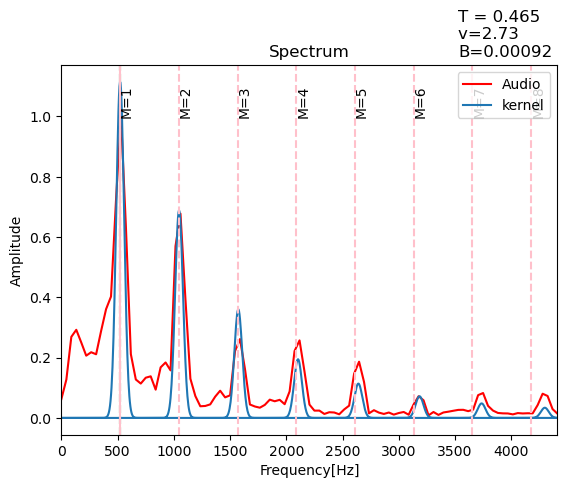

In [65]:
helper.plot_fft(sample_data[6][:1000], power_spectrum=True)
helper.return_kernel_spectrum(f=[522],sigma_f=35, M=8, amplitude=110, T=0.465, v=2.73)
plt.axvline(522, color="pink")
plt.show()